In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pathlib import Path


In [27]:
# Read data

file_path = Path.home() / 'Desktop' / 'Coursera' / 'coursera_clean.csv'
df = pd.read_csv(file_path)

In [31]:
display(df.head())

,Course Title,Rating,Level,Duration,Review,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner,20.0,2.813,"Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner,34.0,100.000,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner,9.0,227.000,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,0.0,Beginner,8.0,0.000,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner,11.0,582.000,"Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues


In [30]:
display(df.describe())

,Rating,Duration,Review
count,8454.000000,8454.000000,8454.000000
mean,3.992394,14.489827,150.297405
std,1.636305,10.649657,227.708361
min,0.000000,0.000000,0.000000
25%,4.500000,9.000000,2.240250
50%,4.700000,11.000000,33.000000
75%,4.800000,18.000000,206.000000
max,5.000000,133.000000,998.000000


In [19]:
# Display the data type of each column to obtain a statistical summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8454 entries, 0 to 8453
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Course Title  8454 non-null   object 
 1   Rating        8454 non-null   float64
 2   Level         8454 non-null   object 
 3   Duration      8454 non-null   float64
 4   Review        8454 non-null   float64
 5   Modules       8414 non-null   object 
 6   Instructor    8366 non-null   object 
 7   Offered By    8454 non-null   object 
 8   Keyword       8454 non-null   object 
 9   Course Url    8454 non-null   object 
dtypes: float64(3), object(7)
memory usage: 660.6+ KB


In [20]:
# Check for duplicates

num_duplicates=df.duplicated().sum()
print(num_duplicates)

0


In [21]:
# Count the number of unique values 

df.nunique()

Course Title    6164
Rating            22
Level              4
Duration          86
Review          1861
Modules         5688
Instructor      3545
Offered By       395
Keyword           10
Course Url      6176
dtype: int64

In [32]:
# Check for data types

print(df.dtypes)

Course Title                       object
Rating                            float64
Level                              object
Schedule                           object
What you will learn                object
Skill gain                         object
Modules                            object
Instructor                         object
Offered By                         object
Keyword                            object
Course Url                         object
Duration to complete (Approx.)    float64
Number of Review                    int64
dtype: object


Level
Beginner level        4871
Intermediate level    2131
Not specified         1106
Advanced level         262
Name: count, dtype: int64

In [48]:
# Select only the columns with 'object' data type

object_col = df.select_dtypes(include = ['object'])

# Count the number of unique values 

group_count = object_col.apply(lambda col: col.nunique())
print(group_count)

Course Title           6081
Level                     4
Schedule                  2
What you will learn    3010
Skill gain             3697
Modules                5688
Instructor             3524
Offered By              395
Keyword                  10
Course Url             6093
dtype: int64


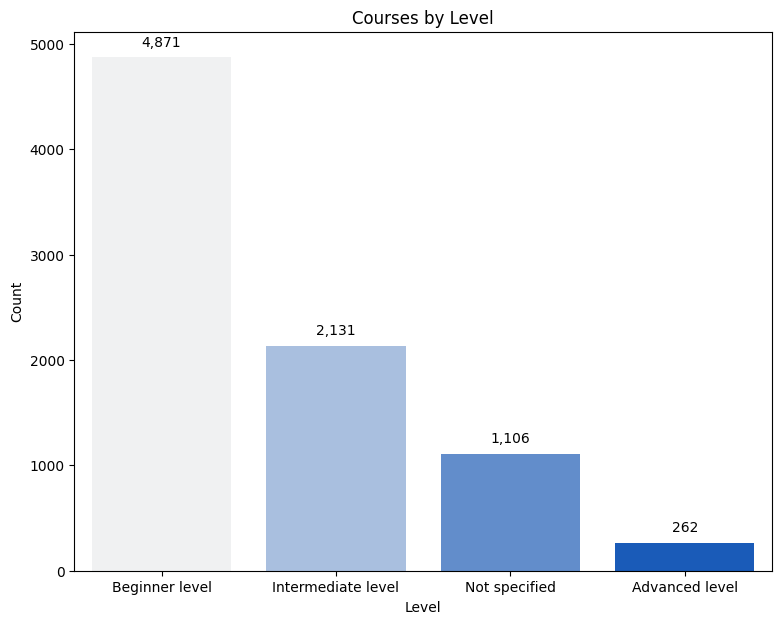

In [17]:
# Create a graph showing the distribution of course levels on Coursera

# Set the figure size
plt.figure(figsize = (9,7)) 
plt.xticks(rotation=0) 

# Create a color palette for the bars
colors = sns.light_palette("#0056D2",4)

sns.countplot(x = 'Level', data = df, hue = 'Level', palette=colors, legend = False)

ax = plt.gca()

# Formatting bars (add labels, positioning text)
for bar in ax.patches: 
    height = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, height + 80, 
        f"{height:,.0f}", 
        ha = 'center', va = 'bottom')

# Set titles and labels
plt.title('Courses by Level')
plt.xlabel('Level')
plt.ylabel('Count')


plt.show()

/var/folders/7l/mwmgzy6s56d4_m2c29rbz9940000gn/T/ipykernel_39718/4199510984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)


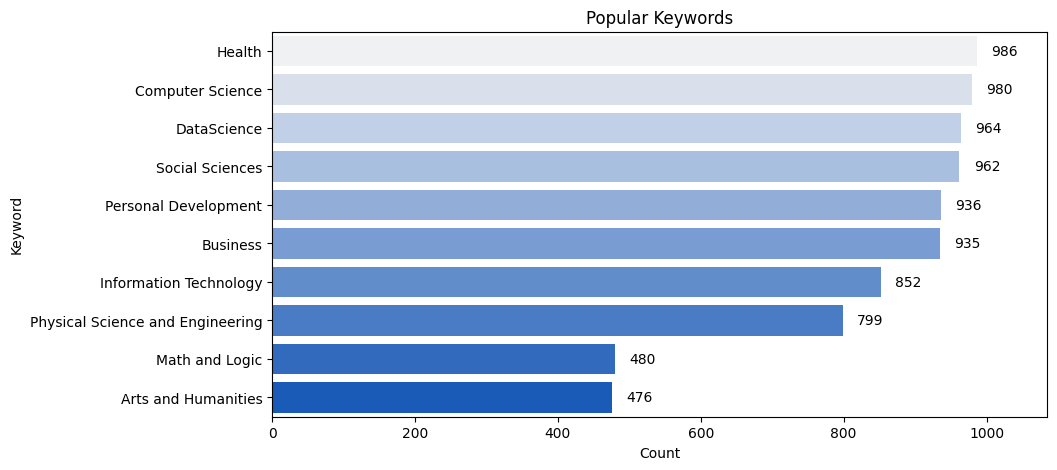

In [258]:
# Create a graph of popular keywords on Coursera
# Create a graph of Offered By on Coursera
# Set the figure size
plt.figure(figsize=(10, 5)) 
plt.xticks(rotation=0) 

# Get the top 10 keywords
top_n = 10
sorted_counts = df['Keyword'].value_counts().nlargest(top_n) 

# Create a color palette for the bars
colors = sns.light_palette("#0056D2", n_colors=len(sorted_counts))

# Plot the bar graph
sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)

ax = plt.gca()

# Set the x-axis limits
plt.xlim(0, sorted_counts.values.max() * 1.1)

# Formatting bars (add labels, positioning text)
for bar in ax.patches: 
    height = bar.get_width() 
    plt.text(height + 20, bar.get_y() + bar.get_height() / 2, 
             f"{height:,.0f}", 
             va='center', ha='left')

# Set titles and labels
plt.title('Popular Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')


plt.show()

/var/folders/7l/mwmgzy6s56d4_m2c29rbz9940000gn/T/ipykernel_39718/2687902958.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)


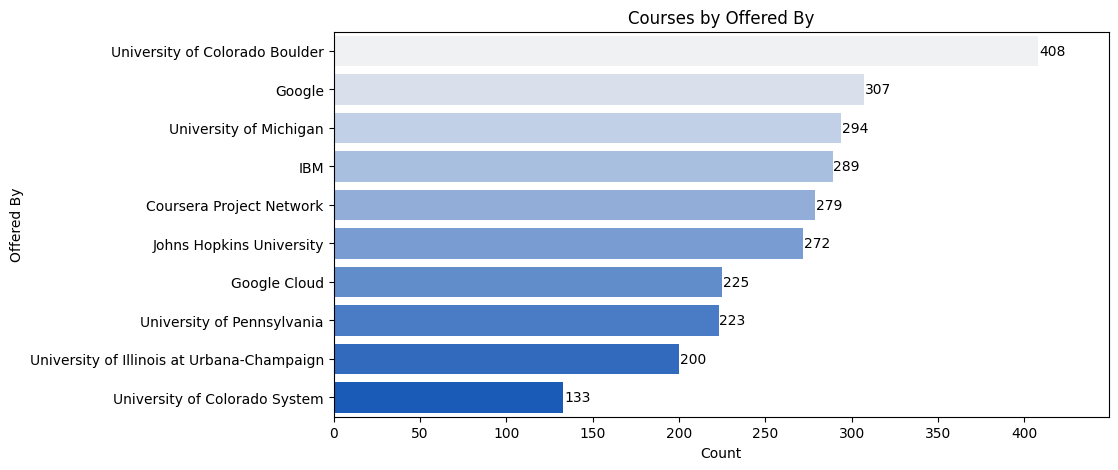

In [264]:
# Create a graph of Offered By on Coursera

# Set the figure size
plt.figure(figsize=(10, 5))
plt.xticks(rotation=0)

# Get the top 10 keywords
top_n = 10
sorted_counts = df['Offered By'].value_counts().nlargest(top_n) 

# Create a color palette
colors = sns.light_palette("#0056D2", n_colors=len(sorted_counts))

# Plot the bar graph
sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)

# Get the current axis
ax = plt.gca()

# Set the x-axis limits
plt.xlim(0, sorted_counts.values.max() * 1.1)

# Annotate bars with counts
for bar in ax.patches:
    height = bar.get_width()  # Use get_width() for horizontal bars
    plt.text(height + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{height:,.0f}",
             ha='left', va='center')

# Set titles and labels
plt.title('Courses by Offered By')
plt.xlabel('Count')
plt.ylabel('Offered By')


plt.show()